In [1]:
%matplotlib inline

In [2]:
print(__doc__)

import numpy as np
import skimage
from distutils.version import LooseVersion
import matplotlib.pyplot as plt


Automatically created module for IPython interactive environment


In [4]:
# find all of the files in the directory
from PIL import Image
import os

hlist=[]
ilist=[]

folders=["../images/skin_lesions/h-mal/", "../images/skin_lesions/org-mal/"]
lists=[hlist,ilist]
for folder, filelist in zip(folders, lists):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".png"):
                filelist.append(os.path.join(root, file))
                
print('Found ', len(hlist),' heatmap files.')
print('Found ', len(ilist),' org files.')


Found  884  heatmap files.
Found  884  org files.


Loaded  884  heatmaps.
(8100,)
Loaded  884  images.


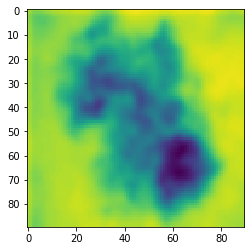

In [21]:
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale
from sklearn.feature_extraction import image

heatmaps=[]
images=[]

# loading images
datasets = [heatmaps, images]
for files,dataset in zip(lists,datasets):
    for file in files:
        np_image=[]
        np_image = np.array(Image.open(file))
        smoothened_heatmap = gaussian_filter(np_image, sigma=3.5)
        rescaled_heatmap = rescale(smoothened_heatmap, 0.4, mode="reflect")
        rescaled_heatmap=rescaled_heatmap[:,:,0]
        #print(rescaled_heatmap.shape)
        dataset.append(rescaled_heatmap.reshape(90*90))


print('Loaded ', len(heatmaps),' heatmaps.')
print(heatmaps[1].shape)
print('Loaded ', len(images),' images.')    
plt.imshow(rescaled_heatmap)

Visualize the resulting regions



(884, 8)


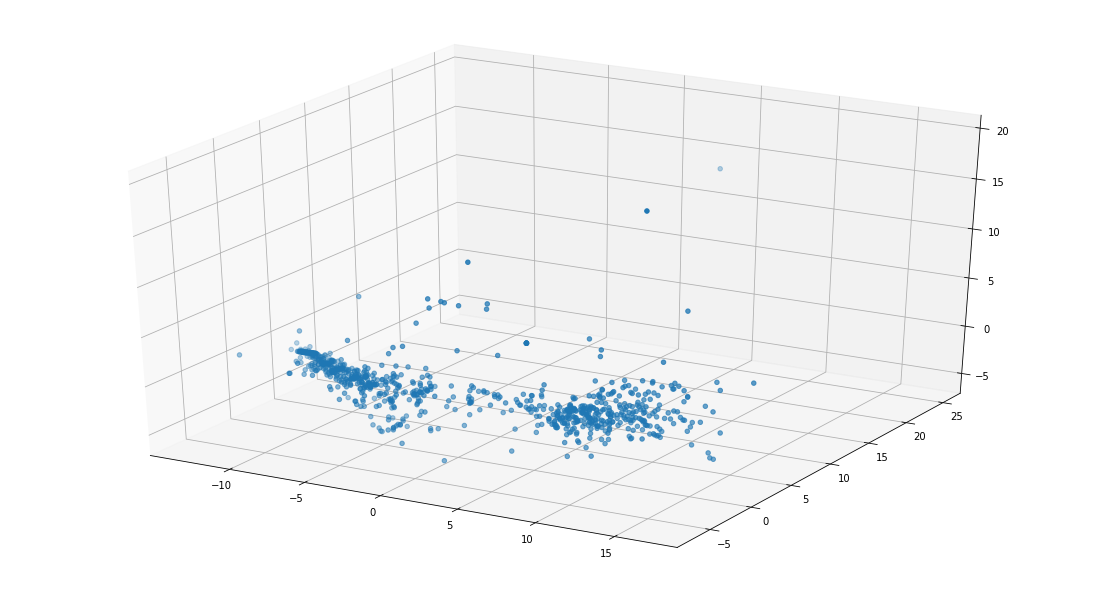

In [22]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

isomap = Isomap(n_neighbors=3,n_components=8,eigen_solver='arpack',path_method='FW', neighbors_algorithm='brute')
X_isomap= isomap.fit_transform(heatmaps)
print(X_isomap.shape)

fig=plt.figure(figsize=(15, 8))
ax = Axes3D(fig)
ax.scatter(X_isomap[:,0],X_isomap[:,1],X_isomap[:,2])

plt.show() 


(884,) (884, 8)


IndexError: index 9 is out of bounds for axis 1 with size 8

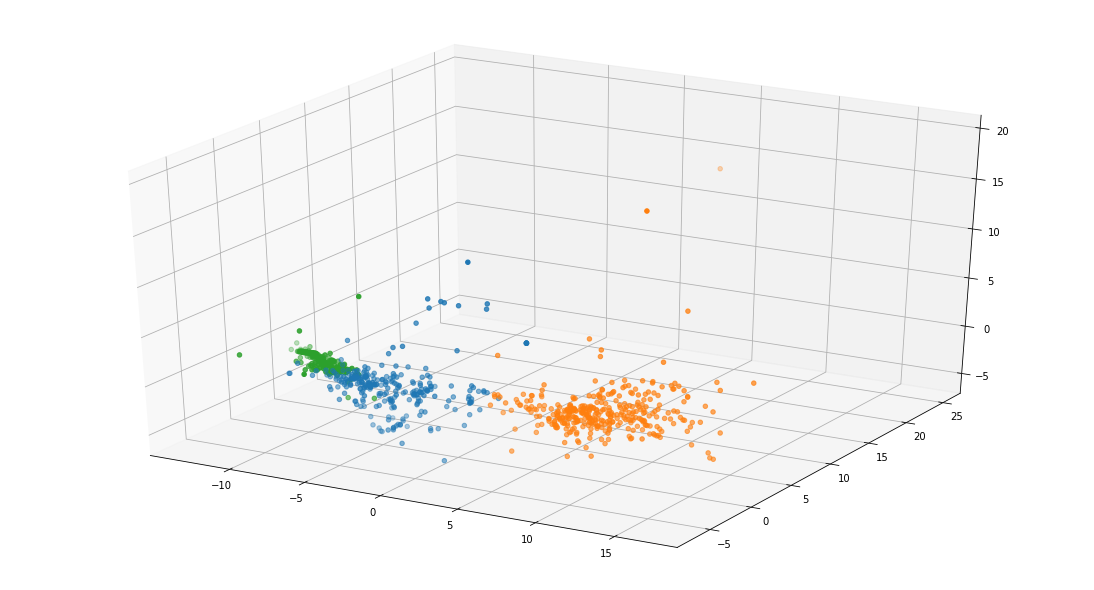

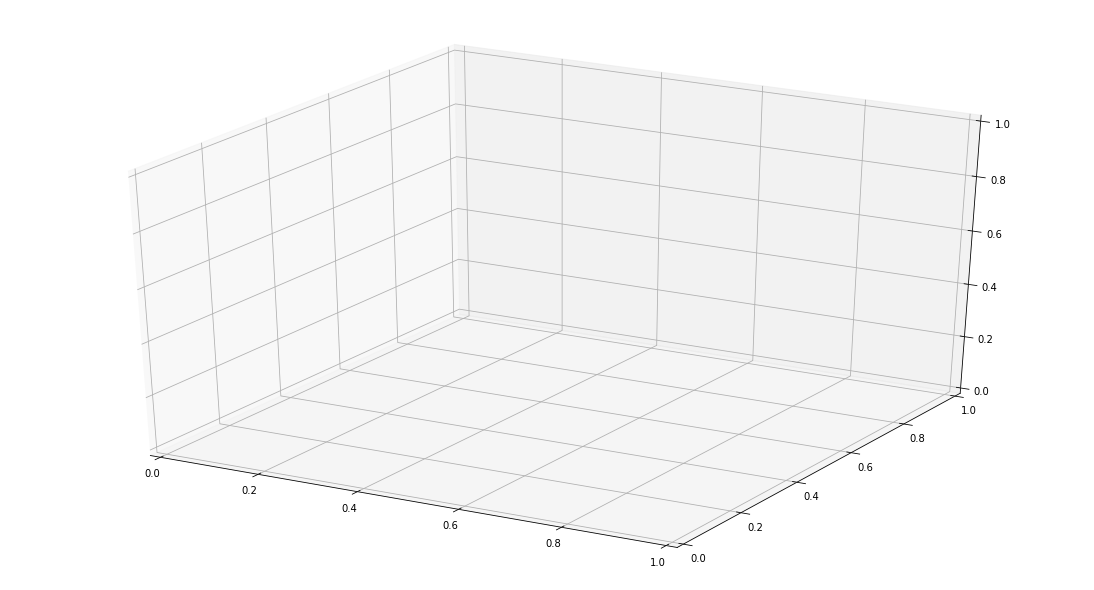

In [23]:
from sklearn.cluster import KMeans

N_CLUSTERS = 3
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0).fit(X_isomap)
labels = kmeans.predict(X_isomap)


print(labels.shape, X_isomap.shape)
fig=plt.figure(figsize=(15, 8))
ax = Axes3D(fig)

for cluster in range(0,N_CLUSTERS):
    ax.scatter(X_isomap[labels==cluster,0],X_isomap[labels==cluster,1],X_isomap[labels==cluster,2])

fig=plt.figure(figsize=(15, 8))
ax = Axes3D(fig)

for cluster in range(0,N_CLUSTERS):
    ax.scatter(X_isomap[labels==cluster,0],X_isomap[labels==cluster,4],X_isomap[labels==cluster,9])
plt.show()

    

(960, 3)


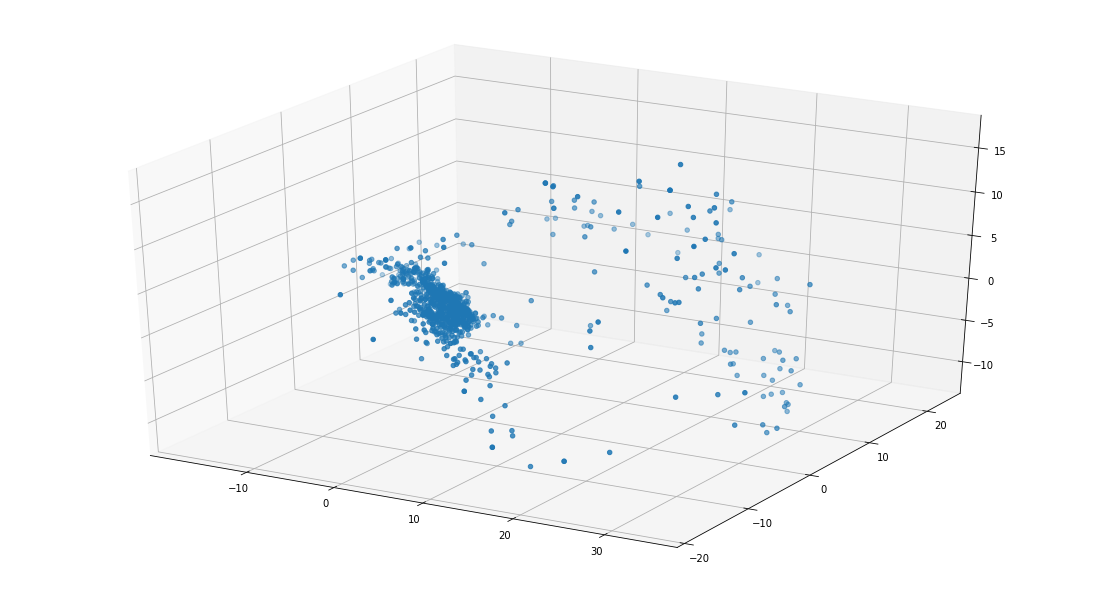

(960,) (960, 3)


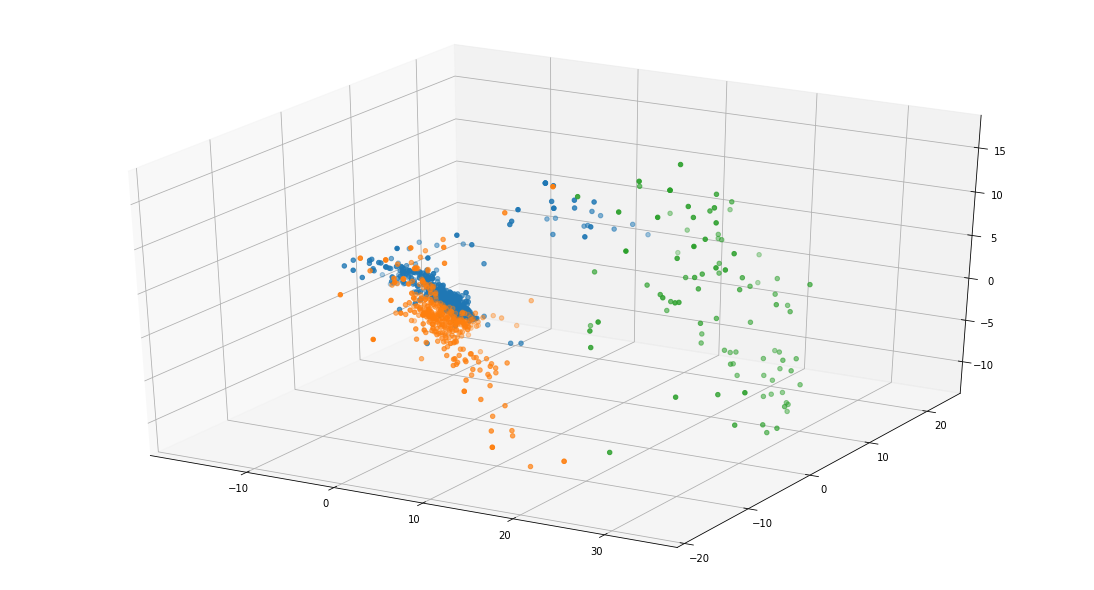

In [111]:
isomap = Isomap(n_neighbors=4,n_components=3,eigen_solver='arpack',path_method='FW', neighbors_algorithm='brute')
images_isomap= isomap.fit_transform(images)
print(images_isomap.shape)

fig=plt.figure(figsize=(15, 8))
ax = Axes3D(fig)
ax.scatter(images_isomap[:,0],images_isomap[:,1],images_isomap[:,2])

#for x, y in zip(X_isomap[:,0],X_isomap[:,1]):
#    plt.text(x,y,str(i),color='red')
#    i=i+1

plt.show() 

N_CLUSTERS = 3
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0).fit(images_isomap)
labels = kmeans.predict(images_isomap)


print(labels.shape, images_isomap.shape)
fig=plt.figure(figsize=(15, 8))
ax = Axes3D(fig)

for cluster in range(0,N_CLUSTERS):
    ax.scatter(images_isomap[labels==cluster,0],images_isomap[labels==cluster,1],images_isomap[labels==cluster,2])

plt.show()

    

(960, 11)


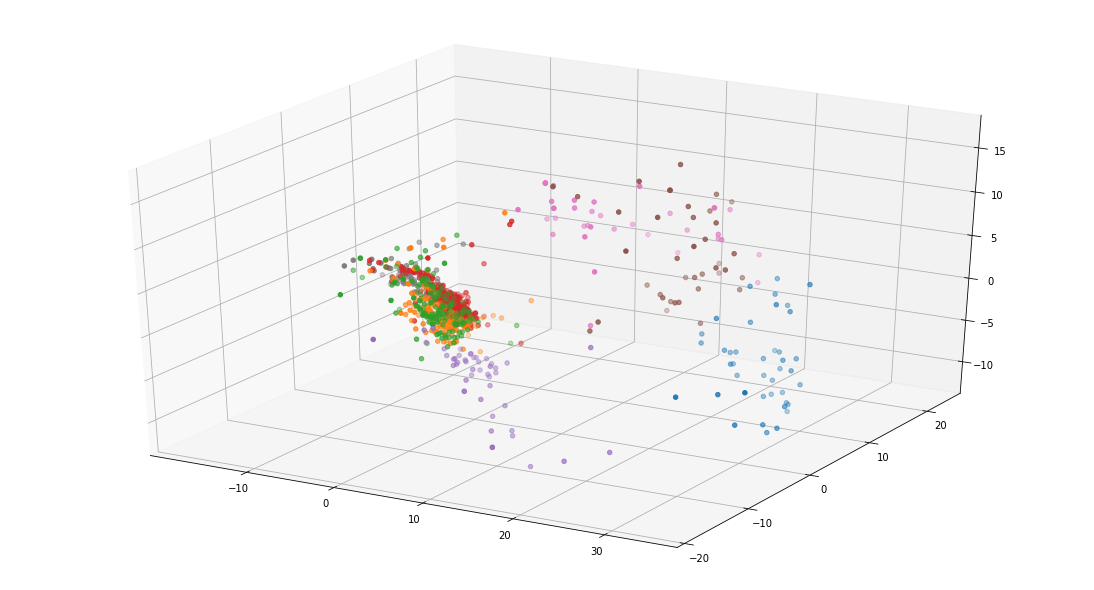

In [118]:
# both heatmaps and images
N_CLUSTERS = 8
isomap=[]
isomap=np.concatenate((images_isomap,X_isomap), axis=1)
print(isomap.shape)
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0).fit(isomap)
labels = kmeans.predict(isomap)


fig=plt.figure(figsize=(15, 8))
ax = Axes3D(fig)

for cluster in range(0,N_CLUSTERS):
    ax.scatter(isomap[labels==cluster,0],isomap[labels==cluster,1],isomap[labels==cluster,2])

plt.show()


In [4]:
from shutil import copy2

for label, image in zip(labels, ilist):
    directory = "../images/heatmaps/" + str(label)
    if not os.path.exists(directory):
        os.makedirs(directory)
    copy2(image, directory)


NameError: name 'labels' is not defined